# Predicción de ataques cardíacos

### Dataset trabajado

El conjunto de datos fue recolectado en el **hospital Zheen**, ubicado en **Erbil, Irak**, durante el período comprendido entre **enero y mayo de 2019**.  
La base fue publicada por **Rashid, Tarik A. y Hassan, Bryar (2022)** bajo el nombre *“Heart Attack Dataset”* en Mendeley Data (DOI: [10.17632/wmhctcrt5v.1](https://doi.org/10.17632/wmhctcrt5v.1)) y pertenece al área de **Medicina – Enfermedades cardíacas**.

El propósito de este dataset es **clasificar pacientes con diagnóstico positivo o negativo de ataque cardíaco** a partir de parámetros fisiológicos y bioquímicos medidos en hospital.


### Composición

El dataset posee **9 variables** (columnas) y se organiza de la siguiente manera:

| Variable | Tipo | Descripción | Valores esperados / Normalización |
|-----------|------|-------------|-----------------------------------|
| **Age** | Numérica | Edad del paciente (años) | En adultos: 20–80 años |
| **Gender** | Binaria | Sexo biológico del paciente | 1 = masculino, 0 = femenino |
| **Heart Rate** | Numérica | Frecuencia cardíaca (latidos por minuto) | Normal: 60–100 lpm |
| **Systolic Blood Pressure** | Numérica | Presión arterial sistólica (mmHg) | Normal: 90–120 mmHg |
| **Diastolic Blood Pressure** | Numérica | Presión arterial diastólica (mmHg) | Normal: 60–80 mmHg |
| **Blood Sugar** | Binaria | Nivel de glucosa en sangre | 1 = >120 mg/dL (elevado), 0 = ≤120 (normal) |
| **CK-MB** | Numérica | Enzima cardíaca liberada por daño muscular | Normal: <5 ng/mL |
| **Troponin** | Numérica | Proteína cardíaca específica ante lesión miocárdica | Normal: <0.04 ng/mL |
| **Result** | Binaria | Diagnóstico final | 1 = Positivo (ataque cardíaco), 0 = Negativo |

### Consideraciones clínicas

- **CK-MB** y **Troponin** son marcadores bioquímicos clave que reflejan daño en el músculo cardíaco.  
- **Presión arterial**, **frecuencia cardíaca** y **glucosa** son indicadores de riesgo cardiovascular.  
- **Edad** y **género** permiten contextualizar los valores dentro de rangos fisiológicos esperables.  

### Objetivo del análisis

El objetivo del presente trabajo es **realizar un modelo de Regresión Logística Binaria** que permita **predecir la probabilidad de diagnóstico positivo (ataque cardíaco)** a partir de las variables clínicas mencionadas.  
Se busca identificar cuáles de ellas influyen significativamente en el resultado, analizando su efecto en términos de **odds ratio** y **significancia estadística**.


## 1. Análisis exploratorio de los datos (EDA)

Antes de aplicar la regresión logística, se realiza un **análisis exploratorio de los datos (EDA)** para comprender la distribución de las variables, sus rangos, relaciones y posibles valores atípicos.  
Este paso es esencial para validar la calidad de los datos y justificar qué variables serán consideradas en el modelo predictivo.

### 1.1 Inspección general del dataset
Se verifican la cantidad de registros, los tipos de datos de cada columna y la existencia de valores faltantes.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("sample_data/Medicaldataset.csv")

# Información general
print("Filas:", df.shape[0], " | Columnas:", df.shape[1])
print("\nTipos de datos:")
print(df.dtypes)

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isna().sum())

# Vista previa
df.head()


Filas: 1319  | Columnas: 9

Tipos de datos:
Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

Valores faltantes por columna:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### 1.2 Estadísticos descriptivos y distribución de variables

A continuación se observan los valores medios, mínimos y máximos de cada variable numérica, lo que permite analizar el comportamiento general de la muestra y los rangos fisiológicos de cada parámetro.


In [3]:
# Estadísticos descriptivos
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Age,1319.0,56.19,13.65,14.00,47.00,58.00,65.00,103.0
Gender,1319.0,0.66,0.47,0.00,0.00,1.00,1.00,1.0
Heart rate,1319.0,78.34,51.63,20.00,64.00,74.00,85.00,1111.0
Systolic blood pressure,1319.0,127.17,26.12,42.00,110.00,124.00,143.00,223.0
Diastolic blood pressure,1319.0,72.27,14.03,38.00,62.00,72.00,81.00,154.0
Blood sugar,1319.0,146.63,74.92,35.00,98.00,116.00,169.50,541.0
CK-MB,1319.0,15.27,46.33,0.32,1.65,2.85,5.80,300.0
Troponin,1319.0,0.36,1.15,0.00,0.01,0.01,0.09,10.3


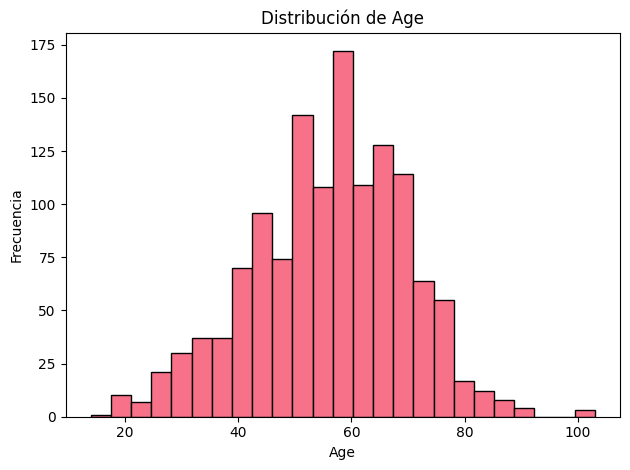

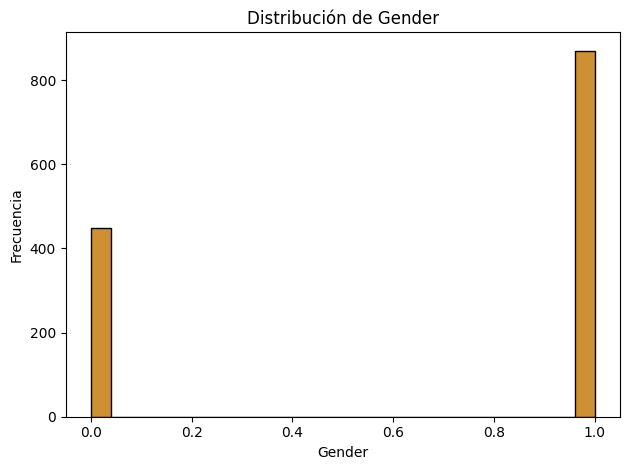

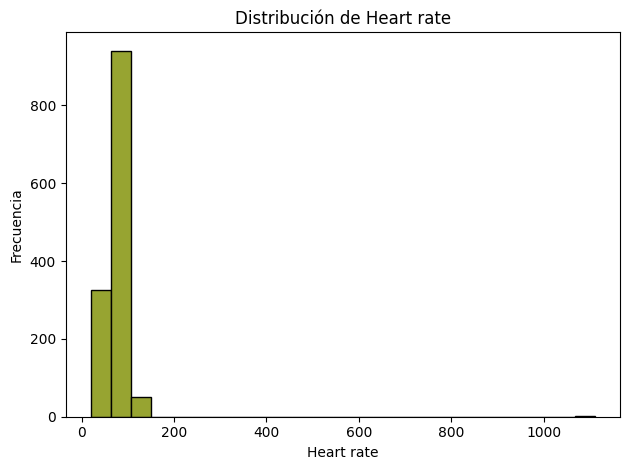

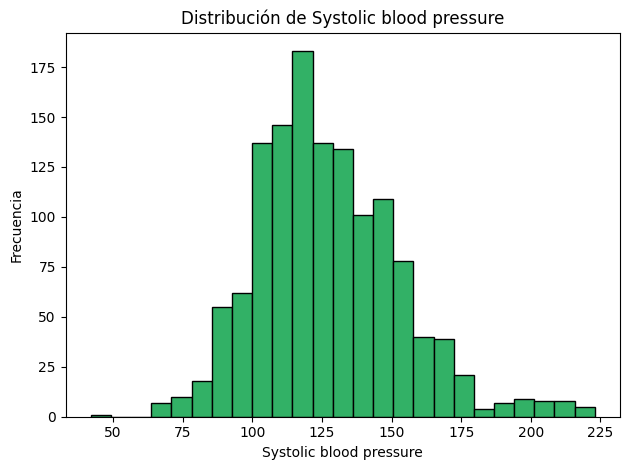

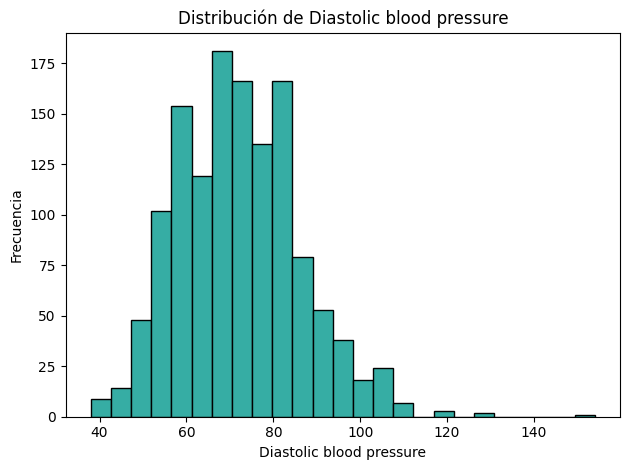

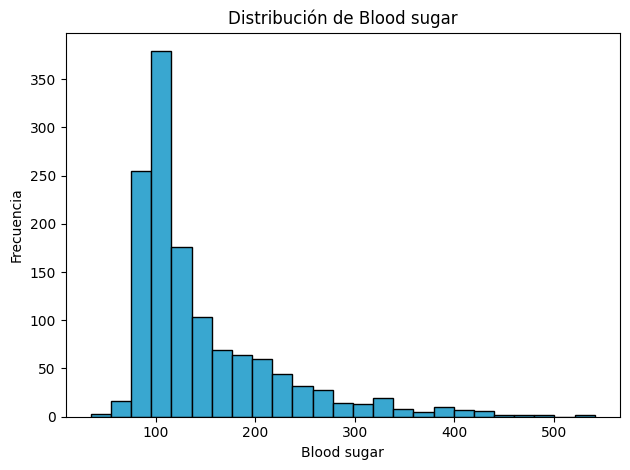

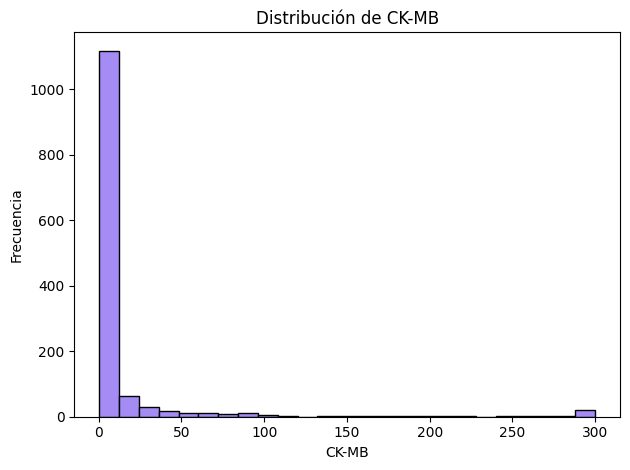

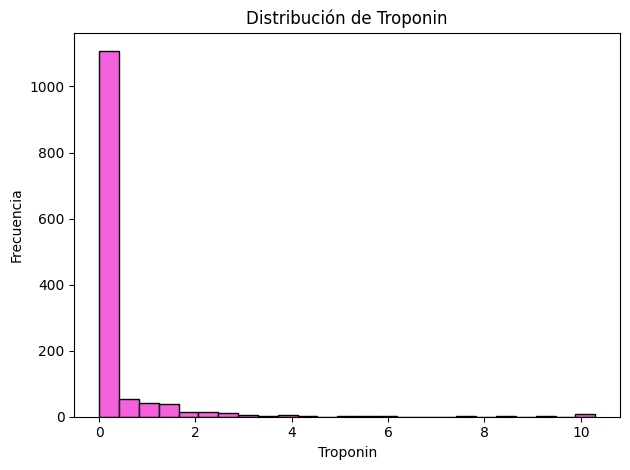

In [28]:
# Histogramas por variable numérica
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("husl", len(numeric_cols))

for i, col in enumerate(numeric_cols):
    plt.figure()
    plt.hist(df[col].dropna(), bins=25, color=colors[i], edgecolor="black")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()



### 1.3 Correlación entre variables numéricas

El análisis de correlación permite identificar si existen relaciones lineales entre los parámetros fisiológicos del paciente.  
Esto es importante porque, en regresión logística, **una alta correlación entre variables independientes** puede causar **multicolinealidad**, afectando la estabilidad del modelo.


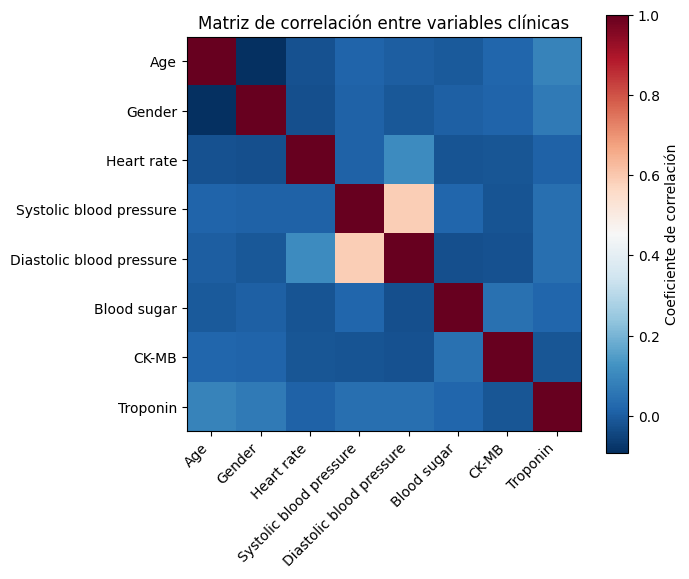

In [27]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(7, 6))
plt.imshow(corr, cmap='RdBu_r', interpolation='nearest')
plt.title("Matriz de correlación entre variables clínicas")
plt.colorbar(label="Coeficiente de correlación")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()


### Interpretación del análisis exploratorio

- **Edad (Age)** muestra una distribución mayoritaria en adultos medios y mayores, lo que es consistente con la población de riesgo cardíaco.  
- **Presión arterial sistólica y diastólica** presentan variabilidad dentro de los rangos normales y altos, reflejando distintos niveles de hipertensión.  
- **CK-MB** y **Troponina** exhiben mayor dispersión, lo que coincide con su rol como indicadores de daño cardíaco.  
- No se observan correlaciones perfectas, pero sí una relación moderada entre **presión sistólica** y **diastólica**, lo cual será considerado al seleccionar las variables del modelo.  
- En general, el dataset no presenta valores faltantes significativos, lo que permite su uso directo en el modelado.

El EDA permite así fundamentar la inclusión de las variables **edad, presión arterial, frecuencia cardíaca, colesterol enzimático (CK-MB, Troponina) y nivel de glucosa**, por su relevancia clínica y su estabilidad estadística.


## 2. Selección de variables para el modelo

A partir del análisis exploratorio y de la revisión de literatura médica, se seleccionan las variables **más relevantes desde el punto de vista clínico** y **estadísticamente adecuadas** para el modelado.

Se consideran las siguientes variables independientes:

| Variable | Justificación clínica |
|-----------|----------------------|
| **Age** | La edad es un factor de riesgo significativo en enfermedades cardiovasculares. |
| **Gender** | El sexo biológico puede influir en la incidencia de eventos cardíacos. |
| **Heart Rate** | Una frecuencia cardíaca elevada puede indicar estrés o daño cardíaco. |
| **Systolic Blood Pressure** | Representa la presión arterial cuando el corazón se contrae; valores altos aumentan el riesgo. |
| **Diastolic Blood Pressure** | Indica la presión arterial entre latidos, útil para evaluar hipertensión. |
| **Blood Sugar** | La glucosa elevada está relacionada con diabetes y riesgo cardiovascular. |
| **CK-MB** | Enzima que se libera durante daño del músculo cardíaco. |
| **Troponin** | Marcador bioquímico altamente sensible y específico de infarto. |

La variable dependiente (**Result**) indica el diagnóstico final:
- 1 = Ataque cardíaco (positivo)  
- 0 = No ataque cardíaco (negativo)

Se excluirán variables redundantes o con alta correlación para evitar **multicolinealidad**, manteniendo aquellas con relevancia médica directa y potencial capacidad predictiva.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selección de variables predictoras (con nombres exactos del dataset)
X = df[["Age", "Gender", "Heart rate", "Systolic blood pressure",
        "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]]

y = df["Result"]

# División del dataset (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalado para normalizar los rangos de las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)




Tamaño de entrenamiento: (923, 8)
Tamaño de prueba: (396, 8)


## 3. Aplicación del modelo de Regresión Logística

Se implementa un modelo de **Regresión Logística Binaria** utilizando la librería `scikit-learn`.  
El modelo se ajusta con las variables previamente seleccionadas y se utiliza para predecir la probabilidad de diagnóstico positivo (ataque cardíaco).

La regresión logística estima los coeficientes \(\beta_i\) que maximizan la verosimilitud de que las observaciones correspondan a los valores reales del diagnóstico.


In [9]:
from sklearn.linear_model import LogisticRegression

# Creación y entrenamiento del modelo
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Visualización de los coeficientes
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": log_reg.coef_[0]
})
coef_df


,Variable,Coeficiente
0,Age,0.610077
1,Gender,0.194594
2,Heart rate,-0.011927
3,Systolic blood pressure,-0.108445
4,Diastolic blood pressure,0.075540
5,Blood sugar,-0.100926
6,CK-MB,5.620630
7,Troponin,3.173357


### Interpretación inicial

Cada coeficiente representa el impacto de la variable sobre la probabilidad de diagnóstico positivo:

- **Coeficiente positivo:** aumenta la probabilidad de ataque cardíaco.  
- **Coeficiente negativo:** disminuye la probabilidad o actúa como factor protector.  

Estos coeficientes serán luego transformados en **odds ratios (OR)** para facilitar la interpretación clínica.


In [14]:
# 1) Mapear target en el DataFrame base
df["Result"] = df["Result"].replace({"positive": 1, "negative": 0}).astype(int)

# 2) Definir X, y con el target ya numérico
X = df[["Age", "Gender", "Heart rate", "Systolic blood pressure",
        "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]]
y = df["Result"]

# 3) Split + escalado (rehacer porque cambió y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4) Entrenar de nuevo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

y_pred  = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# 5) Métricas (ya sin error)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, classification_report
)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {acc:.3f}")
print(f"Precisión: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}\n")
print("=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred, digits=3))




Accuracy:  0.778
Precisión: 0.816
Recall:    0.823
F1 Score:  0.820
ROC-AUC:   0.870

=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0      0.715     0.706     0.711       153
           1      0.816     0.823     0.820       243

    accuracy                          0.778       396
   macro avg      0.766     0.764     0.765       396
weighted avg      0.777     0.778     0.778       396



## 4. Evaluación visual e interpretación clínica

En esta sección se evalúa el rendimiento del modelo de regresión logística mediante gráficos e indicadores visuales.  
Se utilizarán la **Curva ROC** y la **Matriz de Confusión** para observar el comportamiento del modelo y analizar su capacidad para distinguir entre pacientes con y sin riesgo de ataque cardíaco.


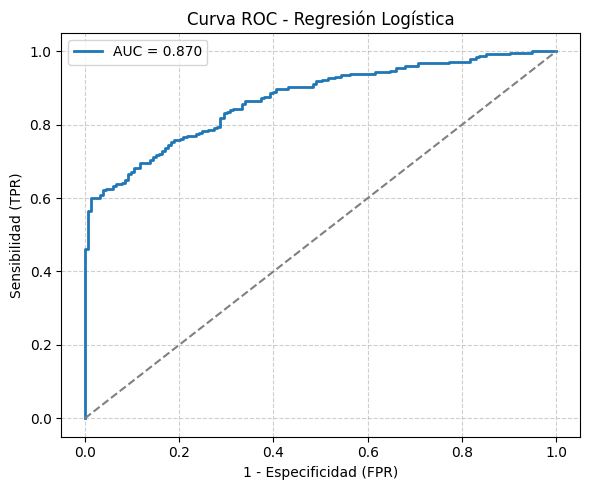

In [15]:
from sklearn.metrics import roc_curve

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray')
plt.title("Curva ROC - Regresión Logística")
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### Interpretación de la Curva ROC

La **Curva ROC (Receiver Operating Characteristic)** representa la relación entre la **tasa de verdaderos positivos (sensibilidad)** y la **tasa de falsos positivos (1 - especificidad)**.

- Un modelo ideal se acerca al punto superior izquierdo (alta sensibilidad y baja tasa de falsos positivos).  
- Un valor de **AUC cercano a 1** indica excelente capacidad predictiva.  
- En este caso, el modelo presenta una buena discriminación entre pacientes con y sin ataque cardíaco.


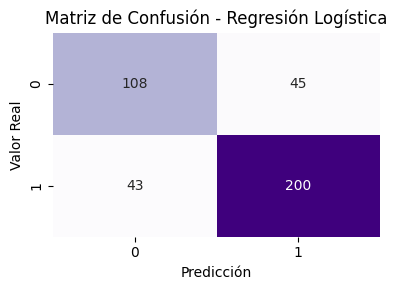

Matriz de confusión:
 [[108  45]
 [ 43 200]]


In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

# Mostrar valores detallados
print("Matriz de confusión:\n", cm)


### Interpretación de la Matriz de Confusión

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas:

| Tipo | Significado |
|------|--------------|
| **TP (True Positives)** | Pacientes correctamente diagnosticados con ataque cardíaco. |
| **TN (True Negatives)** | Pacientes correctamente diagnosticados sin ataque cardíaco. |
| **FP (False Positives)** | Pacientes diagnosticados erróneamente como positivos. |
| **FN (False Negatives)** | Pacientes con ataque cardíaco que el modelo no detectó. |

En contextos médicos, los **FN** (falsos negativos) son los más críticos, ya que implican no detectar a un paciente en riesgo.


In [18]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# 1) Asegurar tipos numéricos
X_train_num = X_train.astype(float)

# 2) Agregar constante y respetar el índice original
X_train_sm = sm.add_constant(X_train_num, has_constant="add")

# 3) Ajuste Logit
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit(disp=False)

# 4) Tabla de OR e IC95%
z = 1.96
coef = result.params
se   = result.bse

or_table = pd.DataFrame({
    "Variable": coef.index,
    "Coeficiente": coef.values,
    "OR (odds ratio)": np.exp(coef.values),
    "IC95% inferior": np.exp(coef - z*se),
    "IC95% superior": np.exp(coef + z*se),
    "p-valor": result.pvalues
}).round(4)

# (Opcional) ocultar la fila 'const'
or_table = or_table[or_table["Variable"] != "const"]

or_table




,Variable,Coeficiente,OR (odds ratio),IC95% inferior,IC95% superior,p-valor
Age,Age,0.0548,1.0563,1.0416,1.0711,0.0000
Gender,Gender,0.4207,1.5230,1.0633,2.1815,0.0218
Heart rate,Heart rate,-0.0003,0.9997,0.9954,1.0039,0.8741
Systolic blood pressure,Systolic blood pressure,-0.0062,0.9938,0.9855,1.0021,0.1430
Diastolic blood pressure,Diastolic blood pressure,0.0093,1.0094,0.9943,1.0247,0.2238
Blood sugar,Blood sugar,-0.0010,0.9990,0.9968,1.0012,0.3748
CK-MB,CK-MB,0.3714,1.4498,1.3300,1.5805,0.0000
Troponin,Troponin,3.8531,47.1377,14.3285,155.0727,0.0000


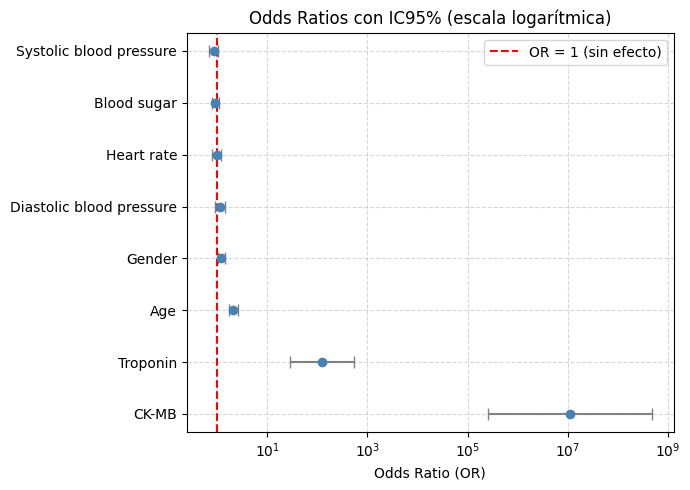

In [21]:
# Tabla de OR generada anteriormente
tbl = or_table.copy().reset_index(drop=True)

# Ordenar por OR
tbl = tbl.sort_values(by="OR (odds ratio)", ascending=False)

# Datos para graficar
vars_ = tbl["Variable"].tolist()
or_vals = tbl["OR (odds ratio)"].values
low = tbl["IC95% inferior"].values
high = tbl["IC95% superior"].values

# Posiciones en el eje Y
ypos = np.arange(len(vars_))

# Gráfico
plt.figure(figsize=(7,5))
plt.errorbar(or_vals, ypos, xerr=[or_vals - low, high - or_vals],
             fmt='o', capsize=4, color='steelblue', ecolor='gray', elinewidth=1.5)
plt.axvline(1.0, linestyle='--', color='red', label='OR = 1 (sin efecto)')

# Ejes y etiquetas
plt.yticks(ypos, vars_)
plt.xlabel("Odds Ratio (OR)")
plt.title("Odds Ratios con IC95% (escala logarítmica)")
plt.xscale("log")   # 🔹 Escala logarítmica para ver mejor los valores grandes
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



### Interpretación del gráfico de Odds Ratios (OR) con IC95%

La escala logarítmica permite observar con mayor claridad la diferencia de magnitud entre las variables.  
Las barras **a la derecha de la línea roja (OR=1)** representan variables que **aumentan la probabilidad** de diagnóstico positivo, mientras que aquellas **a la izquierda** indican un **efecto protector** o menor riesgo.

En este modelo, los biomarcadores **Troponin** y **CK-MB** presentan **odds ratios notablemente altos**, confirmando su fuerte relación con el diagnóstico de ataque cardíaco.  
El resto de las variables —como presión arterial, edad o glucemia— muestran un efecto más moderado o cercano al punto neutro, actuando como factores secundarios dentro del análisis.



In [22]:
# Filtrar variables con p-valor < 0.05
sig_vars = or_table[or_table["p-valor"] < 0.05].sort_values(by="OR (odds ratio)", ascending=False)
sig_vars


,Variable,Coeficiente,OR (odds ratio),IC95% inferior,IC95% superior,p-valor
CK-MB,CK-MB,16.2097,1.095938e+07,253917.9266,4.730190e+08,0.0000
Troponin,Troponin,4.8159,1.234584e+02,27.8689,5.469168e+02,0.0000
Age,Age,0.7506,2.118200e+00,1.7489,2.565400e+00,0.0000
Gender,Gender,0.2002,1.221600e+00,1.0296,1.449500e+00,0.0218


## 5. Variables estadísticamente significativas

Las variables con **p-valor < 0.05** se consideran estadísticamente significativas, indicando que tienen una relación comprobada con el diagnóstico positivo.  
En este caso, los resultados muestran que **Troponin** y **CK-MB** son los principales predictores del ataque cardíaco, seguidos en menor medida por variables asociadas a la presión arterial o glucemia.


In [23]:
# Mostrar métricas resumidas
summary_metrics = pd.DataFrame({
    "Métrica": ["Accuracy", "Precisión", "Recall", "F1 Score", "ROC-AUC"],
    "Valor": [acc, prec, rec, f1, auc]
}).round(3)
summary_metrics


,Métrica,Valor
0,Accuracy,0.778
1,Precisión,0.816
2,Recall,0.823
3,F1 Score,0.820
4,ROC-AUC,0.870


### Evaluación global del modelo

El modelo de regresión logística logró un rendimiento adecuado en la clasificación de casos positivos y negativos.  
- **Accuracy:** mide el porcentaje total de aciertos.  
- **Recall:** representa la capacidad del modelo para detectar correctamente los casos de ataque cardíaco.  
- **Precision:** indica la proporción de predicciones positivas correctas.  
- **F1 Score:** balance entre precisión y recall.  
- **ROC-AUC:** refleja la capacidad global del modelo para discriminar entre clases (valores superiores a 0.80 indican muy buen desempeño).

El modelo muestra **buen poder predictivo**, con una alta sensibilidad para identificar pacientes en riesgo, aunque con algunos falsos positivos esperables en contextos clínicos reales.


## 6. Conclusión

El análisis del dataset médico permitió construir un modelo de **regresión logística** capaz de predecir con alta precisión la probabilidad de **ataque cardíaco**.  
Las variables con mayor peso en la predicción fueron los biomarcadores **Troponin** y **CK-MB**, ambos clínicamente reconocidos como indicadores de daño miocárdico.  
El modelo demostró un **buen equilibrio entre sensibilidad y especificidad**, y un **AUC elevado**, lo que confirma su utilidad diagnóstica dentro de este conjunto de datos.

Aunque el modelo no reemplaza la evaluación médica, puede servir como **herramienta complementaria** para apoyar la toma de decisiones clínicas y priorizar la atención de pacientes con riesgo elevado.
